In [16]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" # don't show GPU messages
from keras.utils import pad_sequences # add zero to normalize all inputs
from keras.models import Sequential # make models
from keras.layers import Dense, Embedding, SimpleRNN # 1)add fully connected 2)word to vectors 3)RNN model 
from keras.datasets import imdb # imdb dataset
import matplotlib.pyplot as plt

# Variabels

In [10]:
max_features = 20000 # use only unique words
maxlen = 80 # maximum length of sequence
batch_size = 32 

# Load Dataset and preprocessing

In [11]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features) #load dataset

X_train = pad_sequences(X_train, maxlen=maxlen) # zero padding to normalize all sequences
X_test = pad_sequences(X_test, maxlen=maxlen) # zero padding to normalize all sequences

# Learning

In [19]:
model = Sequential()
model.add(Embedding(max_features, 128)) #words to vectors and number of dimentions
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()
Net = model.fit(X_train, y_train, batch_size=batch_size, epochs=15, validation_data=(X_test, y_test))
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

Epoch 1/15
782/782 [==============================] - 57s 70ms/step - loss: 0.6708 - accuracy: 0.5702 - val_loss: 0.5231 - val_accuracy: 0.7484
Epoch 2/15
782/782 [==============================] - 49s 63ms/step - loss: 0.5454 - accuracy: 0.7164 - val_loss: 0.6076 - val_accuracy: 0.6544
Epoch 3/15
782/782 [==============================] - 50s 64ms/step - loss: 0.4640 - accuracy: 0.7840 - val_loss: 0.6158 - val_accuracy: 0.6416
Epoch 4/15
782/782 [==============================] - 51s 65ms/step - loss: 0.4199 - accuracy: 0.8148 - val_loss: 0.6390 - val_accuracy: 0.7545
Epoch 5/15
782/782 [==============================] - 50s 64ms/step - loss: 0.3542 - accuracy: 0.8505 - val_loss: 0.4520 - val_accuracy: 0.8068
Epoch 6/15
782/782 [==============================] - 51s 65ms/step - loss: 0.3133 - accuracy: 0.8742 - val_loss: 0.4766 - val_accuracy: 0.8023
Epoch 7/15
782/782 [==============================] - 50s 64ms/step - loss: 0.2634 - accuracy: 0.8962 - val_loss: 0.5763 - val_accuracy:

# Show results

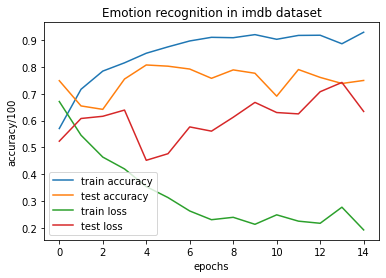

In [20]:
def show_results(N):    # Show Output
    plt.plot(N.history['accuracy'], label='train accuracy')
    plt.plot(N.history['val_accuracy'], label='test accuracy')
    plt.plot(N.history['loss'], label='train loss')
    plt.plot(N.history['val_loss'], label='test loss')
    plt.xlabel("epochs")
    plt.ylabel("accuracy/100")
    plt.legend()
    plt.title("Emotion recognition in imdb dataset")
    plt.show()
show_results(Net)